In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\inkes\\Downloads\\CardioGoodFitness.csv")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


In [3]:
df.isnull().sum()
df.info()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


np.int64(0)

In [4]:
# 1. How many models does store have?
unique_models = df["Product"].nunique()
models = df["Product"].unique()
print(f"There are {unique_models} models they are{models}")

There are 3 models they are['TM195' 'TM498' 'TM798']


Product
TM195    80
TM498    60
TM798    40
Name: count, dtype: int64


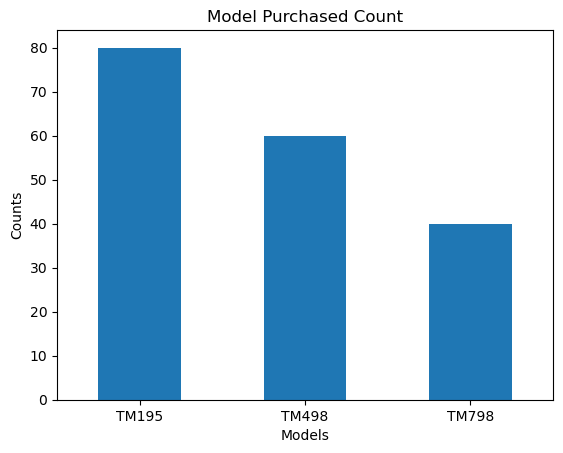

<Figure size 300x200 with 0 Axes>

In [5]:
# 2. Which is most sold Model? 
model_counts = df["Product"].value_counts().plot(kind = 'bar')
print(df["Product"].value_counts())
plt.title("Model Purchased Count")
plt.xticks(rotation=0)
plt.xlabel("Models")
plt.ylabel("Counts")
plt.figure(figsize=(3,2))
plt.show()

In [6]:
# METHOD_2
most_sold = df["Product"].value_counts().idxmax()
print("The most sold model is",most_sold)

The most sold model is TM195


| Gender   |   count |
|:---------|--------:|
| Male     |     104 |
| Female   |      76 |


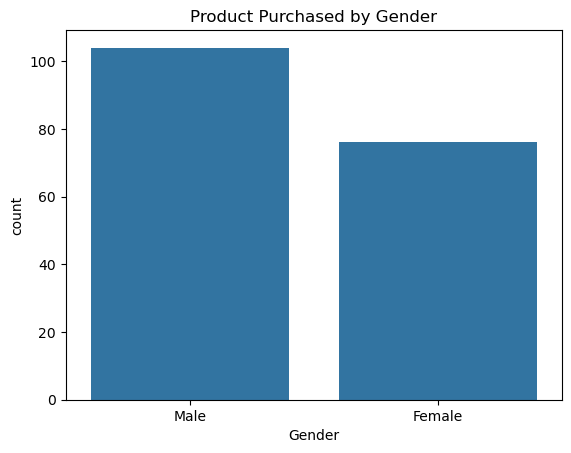

<Figure size 200x400 with 0 Axes>

In [7]:
# 3. Are Male customers buying treadmill more than female customers?
gender_counts = df["Gender"].value_counts().to_markdown()
print(gender_counts)
sns.countplot(x=df["Gender"])
plt.title("Product Purchased by Gender")
plt.figure(figsize=(2,4))
plt.show()

In [8]:
# 4. What is the Income, Age, Education of people buying treadmill?
a = df[['Income',"Age","Education"]].describe().loc[['mean', 'std', 'min', 'max']].round(2).to_markdown()
print(a)


|      |   Income |   Age |   Education |
|:-----|---------:|------:|------------:|
| mean |  53719.6 | 28.79 |       15.57 |
| std  |  16506.7 |  6.94 |        1.62 |
| min  |  29562   | 18    |       12    |
| max  | 104581   | 50    |       21    |


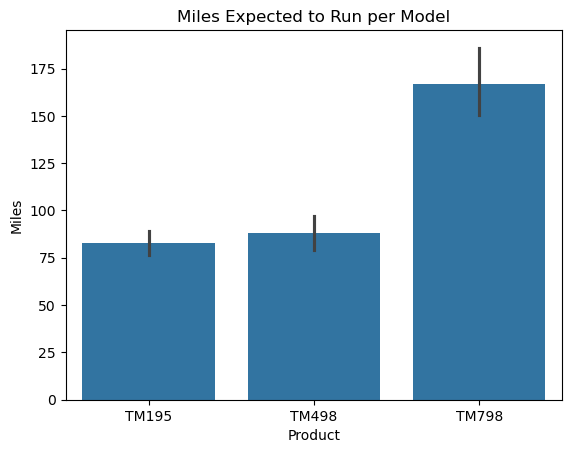

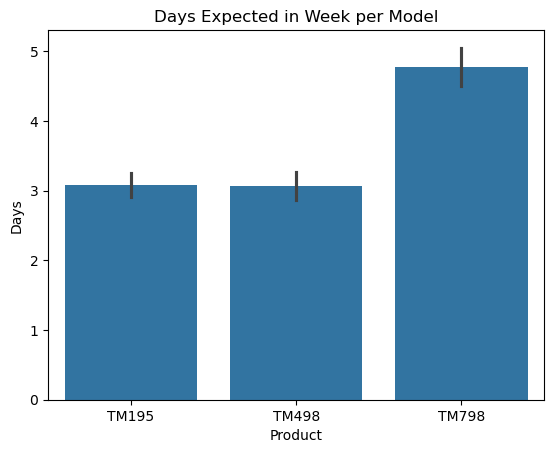

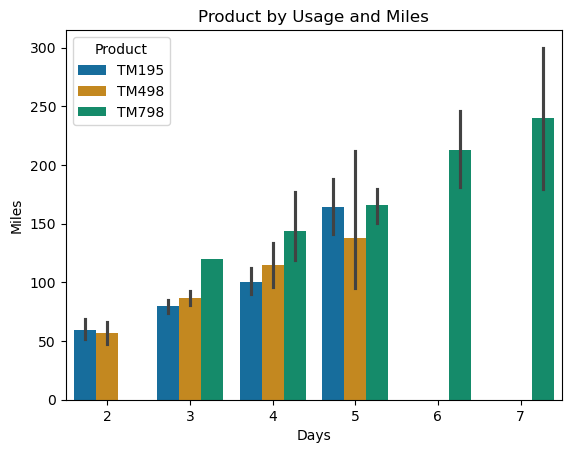

In [9]:
# 5. How many days and miles customer expect to run on treadmill? 
df[["Usage","Miles"]].mean()
sns.barplot(data=df,x="Product",y="Miles")
plt.title("Miles Expected to Run per Model")
plt.show()


sns.barplot(data=df,x="Product",y="Usage")
plt.ylabel("Days")
plt.title("Days Expected in Week per Model")
plt.show()

sns.barplot(x="Usage",y="Miles", hue = "Product", data=df,palette="colorblind")
plt.title("Product by Usage and Miles")
plt.xlabel("Days")
plt.show()

|      |   Fitness |
|:-----|----------:|
| mean |      3.31 |
| std  |      0.96 |
| min  |      1    |
| max  |      5    |
[3]


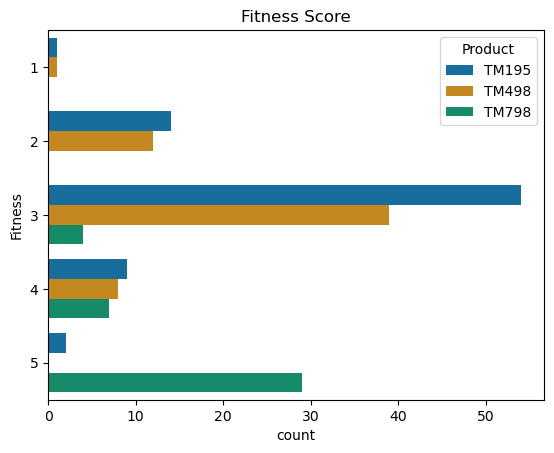

In [10]:
# 6. What is the self-rated fitness of customers buying treadmill.? 
fit_stats = df["Fitness"].describe().loc[['mean', 'std', 'min', 'max']].round(2)
fit_mode = df["Fitness"].mode().to_list()
print(fit_stats.to_markdown())
print(fit_mode)
sns.countplot(data=df,y="Fitness",hue= "Product",palette = "colorblind")
plt.title("Fitness Score")
plt.show()

|                |   count |
|:---------------|--------:|
| ('Partnered',) |     107 |
| ('Single',)    |      73 |
|                        |   count |
|:-----------------------|--------:|
| ('TM195', 'Partnered') |      48 |
| ('TM195', 'Single')    |      32 |
| ('TM498', 'Partnered') |      36 |
| ('TM498', 'Single')    |      24 |
| ('TM798', 'Partnered') |      23 |
| ('TM798', 'Single')    |      17 |


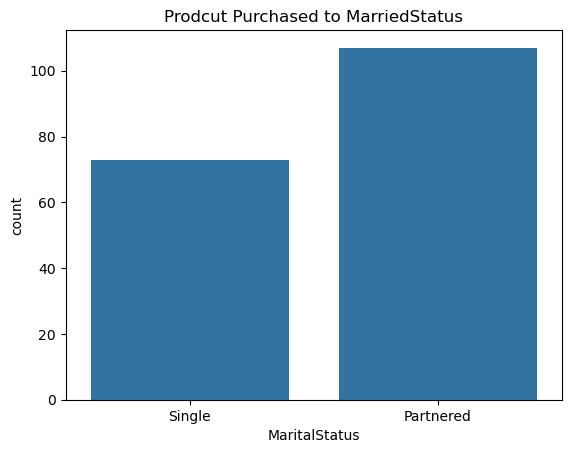

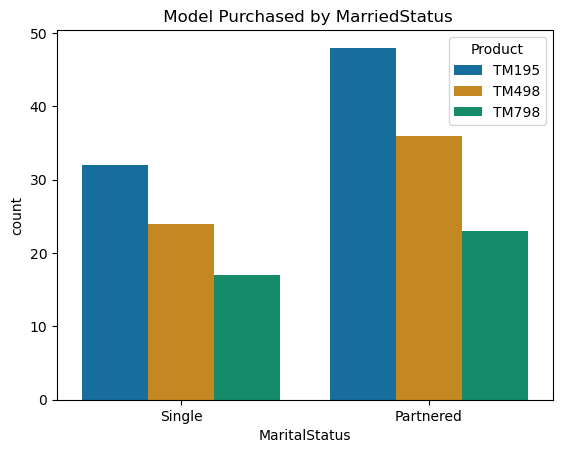

In [11]:
# 7. Is married customer buying Treadmill more than Single customers? 
maritalstatus_counts = df[["MaritalStatus"]].value_counts().to_markdown()
print(maritalstatus_counts)

maritalstatus_model_count = df.groupby("Product")[["MaritalStatus"]].value_counts().to_markdown()
print(maritalstatus_model_count)

sns.countplot(x=df["MaritalStatus"])
plt.title("Prodcut Purchased to MarriedStatus")
plt.show()

sns.countplot(data=df,x="MaritalStatus",hue="Product",palette="colorblind")
plt.title(" Model Purchased by MarriedStatus")
plt.show()

| Product   |   Income |
|:----------|---------:|
| TM798     |  75441.6 |
| TM498     |  48973.7 |
| TM195     |  46418   |


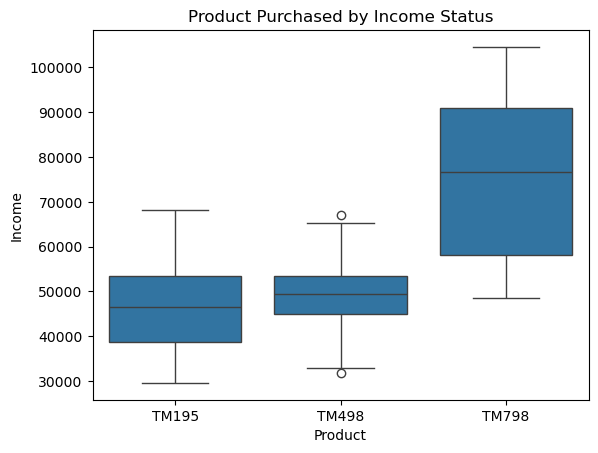

In [12]:
# 8. Is there any relation between Income and model.? 
income_model = df.groupby("Product")['Income'].mean().sort_values(ascending=False).to_markdown()
print(income_model)

sns.boxplot(data=df,y="Income",x="Product")
plt.title("Product Purchased by Income Status")
plt.show()

| Product   |   Age |
|:----------|------:|
| TM798     | 29.1  |
| TM498     | 28.9  |
| TM195     | 28.55 |


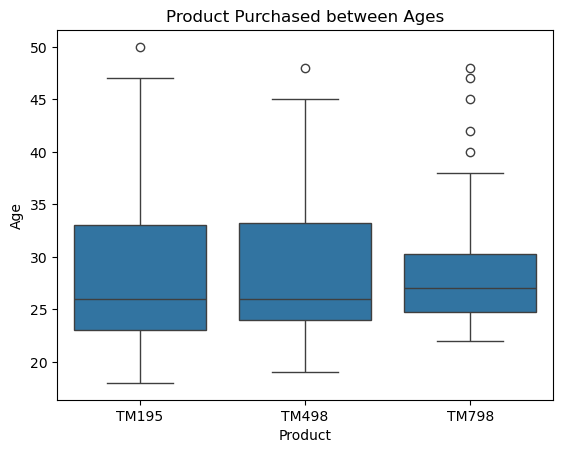

In [13]:
# 9. Is there any relation between Age and model? 
age_model = df.groupby(["Product"])["Age"].mean().sort_values(ascending=False).to_markdown()
print(age_model)

sns.boxplot(data=df,y="Age",x="Product")
plt.title("Product Purchased between Ages") 
plt.show()

| Product   |   Fitness |
|:----------|----------:|
| TM798     |      4.62 |
| TM195     |      2.96 |
| TM498     |      2.9  |


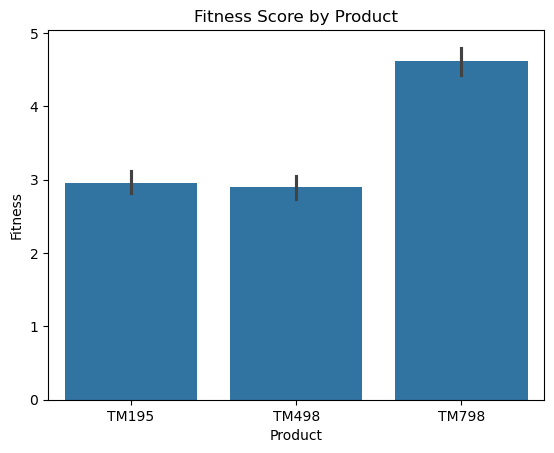

In [14]:
# 10. Is there any relation between self-rated fitness and model? 
fitness_model = df.groupby(["Product"])["Fitness"].mean().round(2).sort_values(ascending=False).to_markdown()
print(fitness_model)

sns.barplot(data=df,y="Fitness",x="Product")
plt.title("Fitness Score by Product") 
plt.show()

| Product   |   Education |
|:----------|------------:|
| TM798     |       17.32 |
| TM498     |       15.12 |
| TM195     |       15.04 |


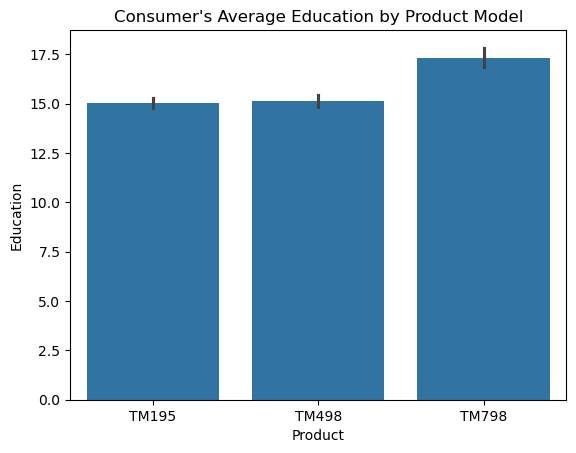

In [15]:
# 11. Is there any relation between education and model.? 
edu_model = df.groupby(["Product"])["Education"].mean().round(2).sort_values(ascending=False).to_markdown()
print(edu_model)

sns.barplot(data=df,y="Education",x="Product")
plt.title("Consumer's Average Education by Product Model") 
plt.show()

| Product   |   Female |   Male |
|:----------|---------:|-------:|
| TM195     |       40 |     40 |
| TM498     |       29 |     31 |
| TM798     |        7 |     33 |


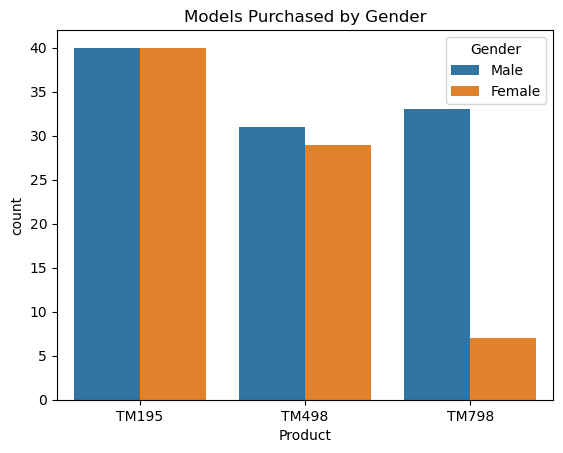

In [16]:
# 12. Does gender have any effect on model customer buy.? 
gender_effect = df.groupby(["Product","Gender"]).size().unstack(fill_value=0).to_markdown()
print(gender_effect)

sns.countplot(data=df,x="Product",hue="Gender")
plt.title("Models Purchased by Gender")
plt.show()

| Product   |   Partnered |   Single |
|:----------|------------:|---------:|
| TM195     |          48 |       32 |
| TM498     |          36 |       24 |
| TM798     |          23 |       17 |


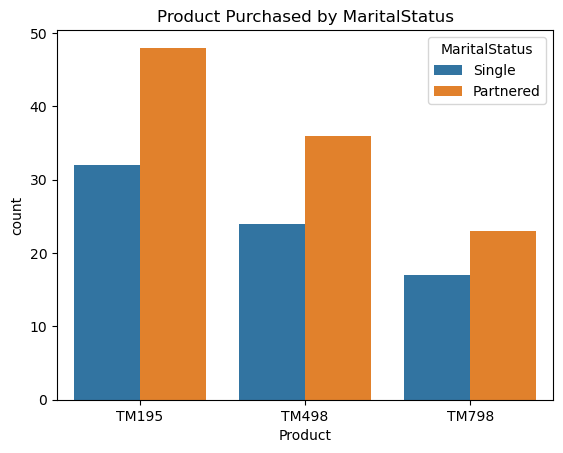

In [17]:
# 13. Does Martial status has any effect model customer buy.? 
maritalstatus = df.groupby(["Product","MaritalStatus"]).size().unstack(fill_value=0).to_markdown()
print(maritalstatus)
sns.countplot(data=df,x="Product",hue="MaritalStatus")
plt.title("Product Purchased by MaritalStatus")
plt.show()

         min  max   mean   std
Product                       
TM195     18   50  28.55  7.22
TM498     19   48  28.90  6.65
TM798     22   48  29.10  6.97


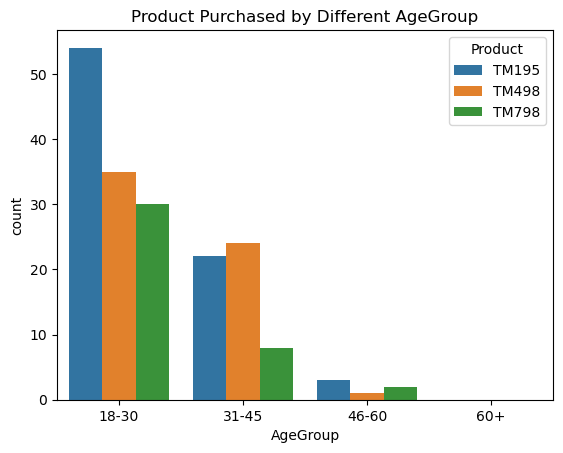

In [18]:
# 14. Are there different age groups buying different models.? 
dif_age = df.groupby(["Product"])["Age"].agg(['min', 'max', 'mean', 'std']).round(2)
print(dif_age)
df["AgeGroup"] = pd.cut(df["Age"], bins =[18,30,45,60,80], labels = ["18-30","31-45","46-60","60+"])


sns.countplot(data=df,x="AgeGroup",hue="Product")
plt.title("Product Purchased by Different AgeGroup")
plt.show()

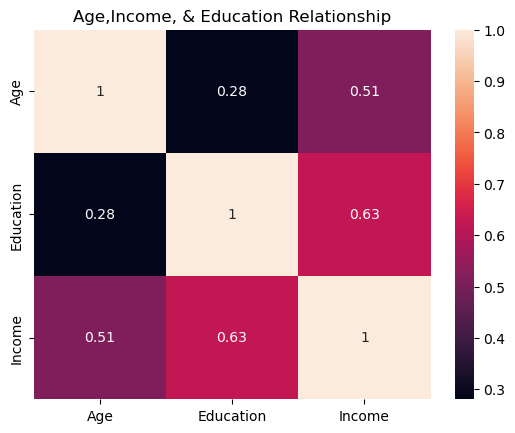

In [20]:
# 15. Relation between Age, Income and education and model bought? 
corr = df[["Age","Education","Income"]].corr()
corr
sns.heatmap(corr,annot=True)
plt.title("Age,Income, & Education Relationship")
plt.show()